<a href="https://colab.research.google.com/github/saro0307/AI-detector/blob/main/AI_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv ('/content/chatgpt_paraphrases.csv')
print(df)
print(df.shape)

                                                    text  \
0      What is the step by step guide to invest in sh...   
1      What is the story of Kohinoor (Koh-i-Noor) Dia...   
2      How can I increase the speed of my internet co...   
3      Why am I mentally very lonely? How can I solve...   
4      Which one dissolve in water quikly sugar, salt...   
...                                                  ...   
58201  Why does the BCCI logo resemble that on the Br...   
58202   Where have you read the most eloquent paragraph?   
58203  After Japan took its goals in WW2 Pacific cama...   
58204  What would be the benefits of a land value tax...   
58205  I want to pursue a master's in computer scienc...   

                                             paraphrases  category source  
0      ['Can you provide a detailed procedure for inv...  question  quora  
1      ['Can you tell me about the history of the Koh...  question  quora  
2      ['What are some ways to enhance my internet 

In [ ]:
df['text'][1]
df['paraphrases'][1]

"['Can you tell me about the history of the Kohinoor (Koh-i-Noor) Diamond?', 'What is the tale behind the Kohinoor (Koh-i-Noor) Diamond?', 'Could you narrate the story of the Kohinoor (Koh-i-Noor) Diamond?', 'What is the account of the Kohinoor (Koh-i-Noor) Diamond?', 'Can you describe the legend of the Kohinoor (Koh-i-Noor) Diamond?']"

In [ ]:
df=pd.DataFrame(category.items(),columns=["text","category"])
df=df.sample(frac=1)
df=df[:20000]
df

,text,category
11409,'What are some of your most firmly held convic...,chatgpt
35573,'Can a girl have feelings for you but take a l...,chatgpt
41737,What is the ethical consideration of the police?,human
103816,What if India breaks the Indus water treaty wi...,human
62587,'Can you explain what gel hand exercise balls ...,chatgpt
...,...,...
65807,What's the key to having a successful relation...,human
40304,what is the way to start career in digital mar...,human
73305,'What is the reason behind the pleasurable sen...,chatgpt
69868,'What are the steps to begin a designing busin...,chatgpt


In [ ]:
df["category"].value_counts()

human      10173
chatgpt     9827
Name: category, dtype: int64

In [ ]:
X=df['text']
y=df['category']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
lg = LogisticRegression(penalty='l1',solver='liblinear')
sv = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bg = BaggingClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
def prediction(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pr = model.predict(X_test)
    acc_score = metrics.accuracy_score(y_test, pr)
    f1 = metrics.f1_score(y_test, pr, average="binary", pos_label="chatgpt")
    return acc_score, f1

acc_score = {}
f1_score = {}
clfs = {
    'LR': lg,
    'SVM': sv,
    'DTC': dtc,
    'KNN': knn,
    'RFC': rfc,
    'ETC': etc,
    'ABC': abc,
    'BG': bg,
    'GBC': gbc,
}
for name, clf in clfs.items():
    acc_score[name], f1_score[name] = prediction(clf, X_train_tfidf, X_test_tfidf, y_train, y_test)

# View those scores
for name, acc in acc_score.items():
    print(f'Accuracy for {name}: {acc}')

for name, f1 in f1_score.items():
    print(f'F1 score for {name}: {f1}')


Accuracy for LR: 0.82325
Accuracy for SVM: 0.82925
Accuracy for DTC: 0.71475
Accuracy for KNN: 0.69825
Accuracy for RFC: 0.824
Accuracy for ETC: 0.8365
Accuracy for ABC: 0.764
Accuracy for BG: 0.79275
Accuracy for GBC: 0.757
F1 score for LR: 0.8202390033053649
F1 score for SVM: 0.824466718067335
F1 score for DTC: 0.7024771838331161
F1 score for KNN: 0.6285010772545399
F1 score for RFC: 0.821501014198783
F1 score for ETC: 0.8329075114971896
F1 score for ABC: 0.7604060913705584
F1 score for BG: 0.7902858588413862
F1 score for GBC: 0.7560240963855421


In [ ]:
etc.fit(X_train_tfidf,y_train)

ExtraTreesClassifier(n_estimators=50, random_state=2)

In [ ]:
y_preddf=pd.DataFrame(y_pred)
y_preddf.rename(columns={0:'category predicted'},inplace=True)
y_preddf

,category predicted
0,human
1,human
2,human
3,human
4,human
...,...
3995,chatgpt
3996,chatgpt
3997,human
3998,human


In [ ]:
x_testdf=pd.DataFrame(X_test)
y_testdf=pd.DataFrame(y_test)
x_testdf['id'] = range(1, len(x_testdf) + 1)
y_testdf['id'] = range(1, len(y_testdf) + 1)
y_preddf['id'] = range(1, len(y_preddf) + 1)
join1=y_testdf.merge(x_testdf, how = 'inner' ,indicator=False)
join_df=join1.merge(y_preddf, how = 'inner' ,indicator=False)
join_df[20:30]

,category,id,text,category predicted
20,human,21,Which species in the animal kingdom takes the ...,chatgpt
21,human,22,How much internal memory is left in HTC One M8...,chatgpt
22,human,23,Is sex is required in relationship?,chatgpt
23,human,24,Do you respect Salman Khan?,chatgpt
24,human,25,How do I download movies without torrents?,human
25,human,26,Do women like men who shed tears?,human
26,chatgpt,27,'How can men decrease fat in their thighs and ...,chatgpt
27,human,28,Does btech biotechnology offer a bright future?,human
28,chatgpt,29,'What are some common social mistakes to steer...,chatgpt
29,human,30,How can I reduce the size of a PDF file to und...,human


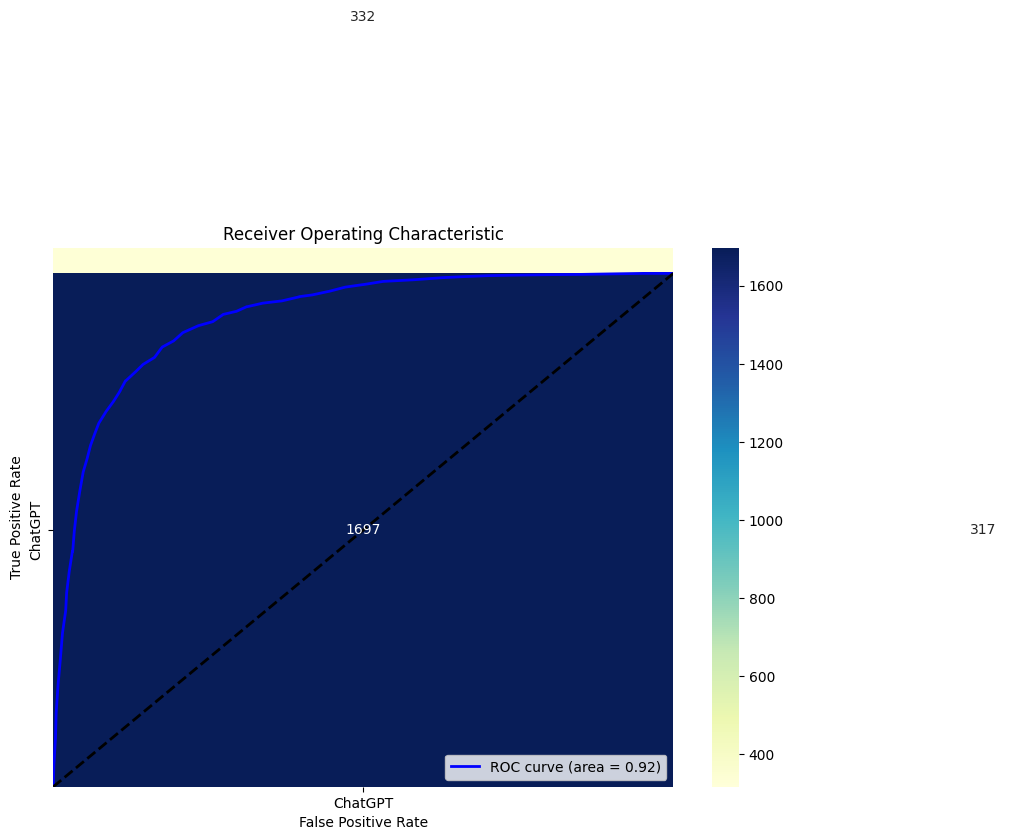

In [117]:
# confusion matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, index = [i for i in ["ChatGPT","Human"]],
                  columns = [i for i in ["ChatGPT","Human"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="YlGnBu", fmt='g')

# roc curve

from sklearn.metrics import roc_curve,auc
y_prob = etc.predict_proba(X_test_tfidf)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='human')

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy_score=metrics.accuracy_score(y_pred,y_test)*100
accuracy_score

49.975

In [ ]:
input=['Hello!! This is Ana de Armas']
vect_input=vectorizer.transform(input)
etc.predict(vect_input)

#array(['human'], dtype=object)

input=['Hello!! This is chatgpt']
vect_input=vectorizer.transform(input)
etc.predict(vect_input)

#array(['human'], dtype=object)

input=['Can you please provide a step by step guide for writing articles online']
vect_input=vectorizer.transform(input)
etc.predict(vect_input)

#array(['chatgpt'], dtype=object)

input=['These are the websites for watching movies that I can recommend you']
vect_input=vectorizer.transform(input)
etc.predict(vect_input)

#array(['chatgpt'], dtype=object)

array(['chatgpt'], dtype=object)